In [3]:
%pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import io

In [7]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
text = io.BytesIO(response.content)
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [8]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [9]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

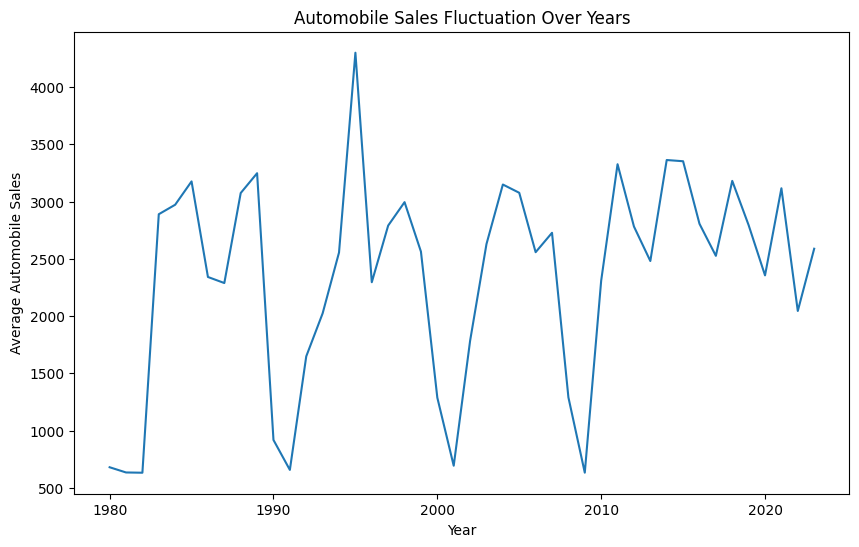

In [19]:
# Grouping sales data by year and calculating the mean sales for each year
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))

# Plotting the line chart
df_line.plot(kind='line')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales Fluctuation Over Years')

plt.show()

## TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

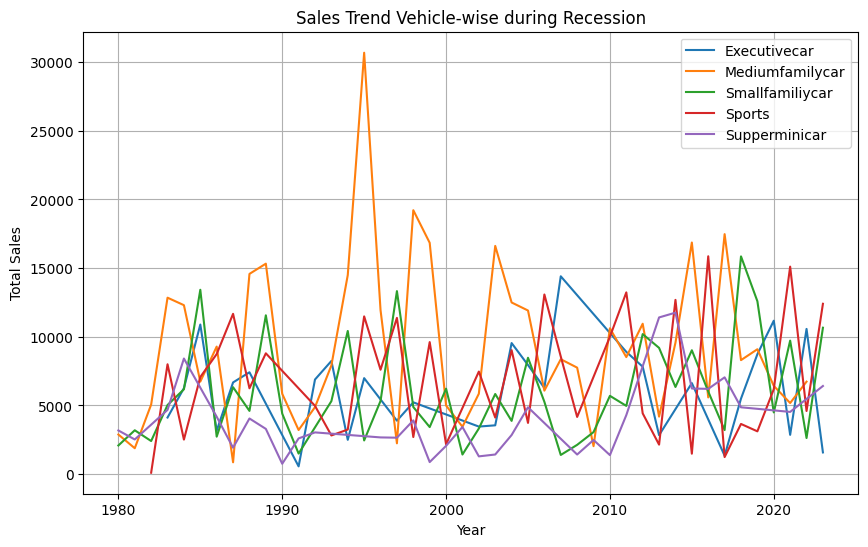

In [18]:
# Grouping sales data by year and vehicle type, then summing the sales for each group
df_Mline = df.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()

# Setting the index to 'Year'
df_Mline.set_index('Year', inplace=True)

# Grouping by 'Vehicle_Type' and plotting multiple lines for each vehicle type
df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales'].plot(kind='line', figsize=(10, 6))

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend()  # Adding legend to identify vehicle types
plt.grid(True)
plt.show()

## TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

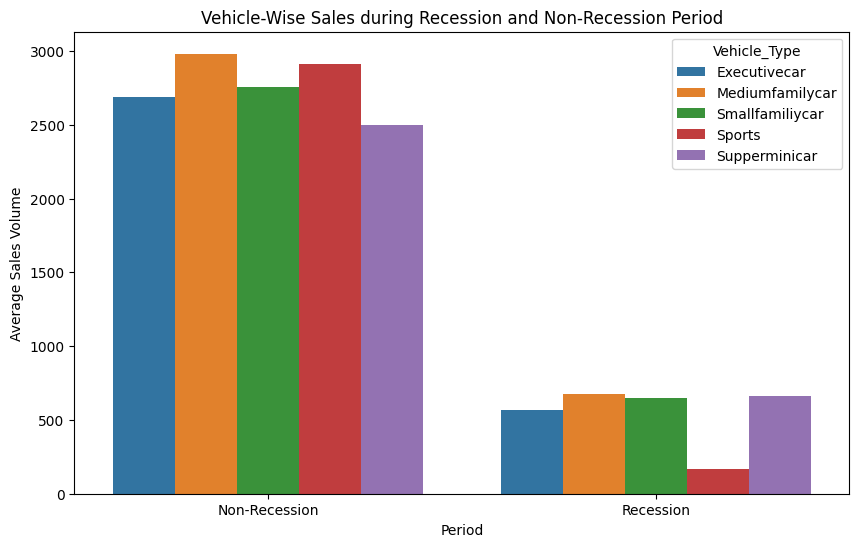

In [17]:
# Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

# Group by recession and vehicle type, then calculate the mean sales
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Sales Volume')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

## TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

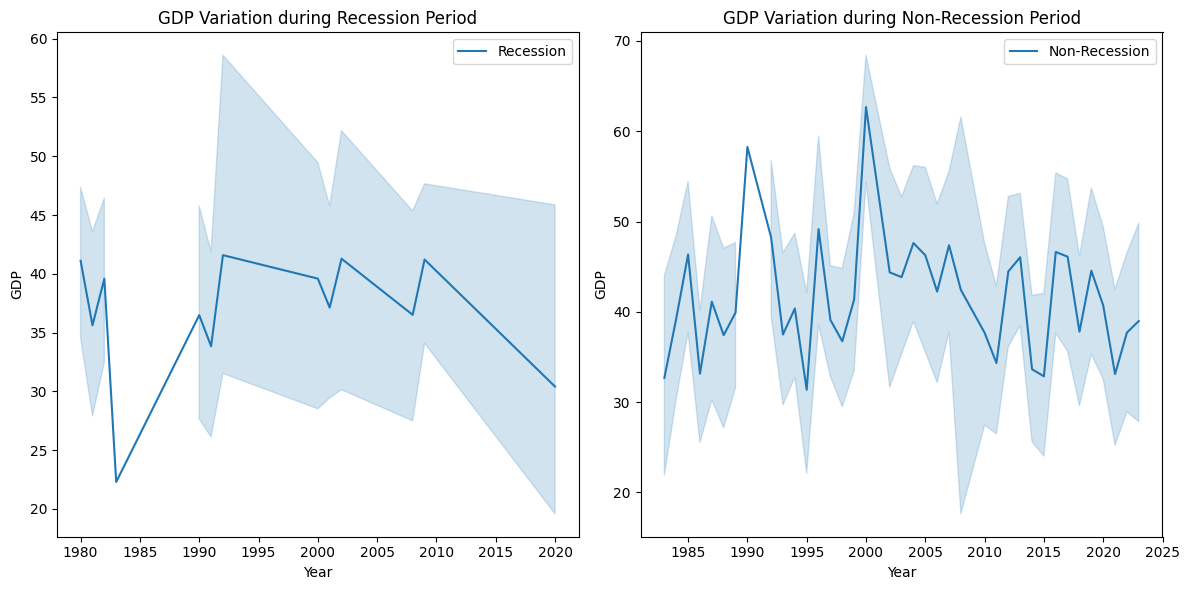

In [16]:
# Create dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot).

# Plot for recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot for non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()

## TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

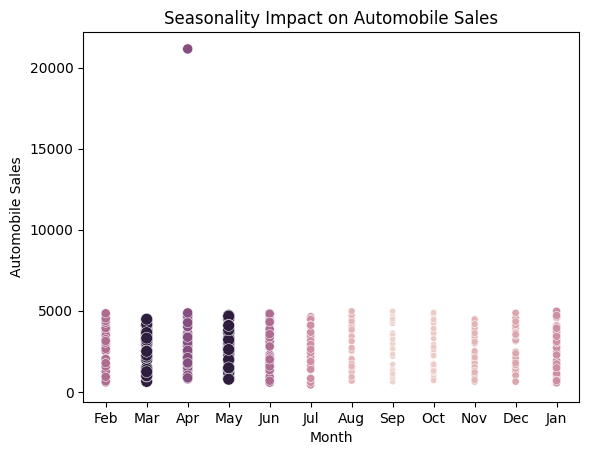

In [20]:
# Filter data for non-recession periods
non_rec_data = df[df['Recession'] == 0]

# Define size for bubble effect (based on 'Seasonality_Weight')
size = non_rec_data['Seasonality_Weight']

# Create bubble plot
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

plt.show()

## TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

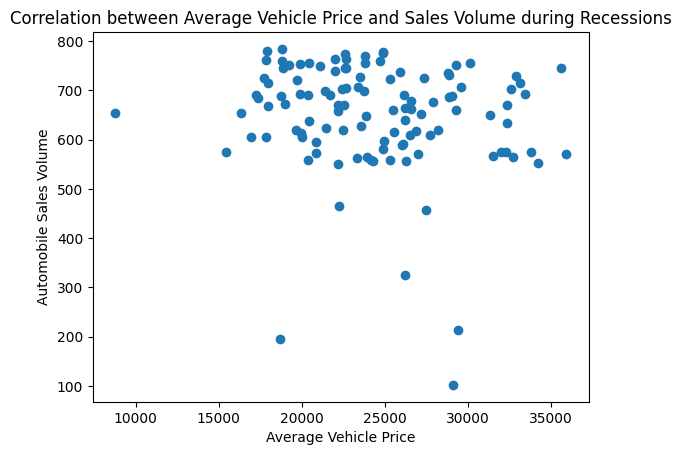

In [21]:
# Filter data for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales Volume')
plt.title('Correlation between Average Vehicle Price and Sales Volume during Recessions')

plt.show()

## TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

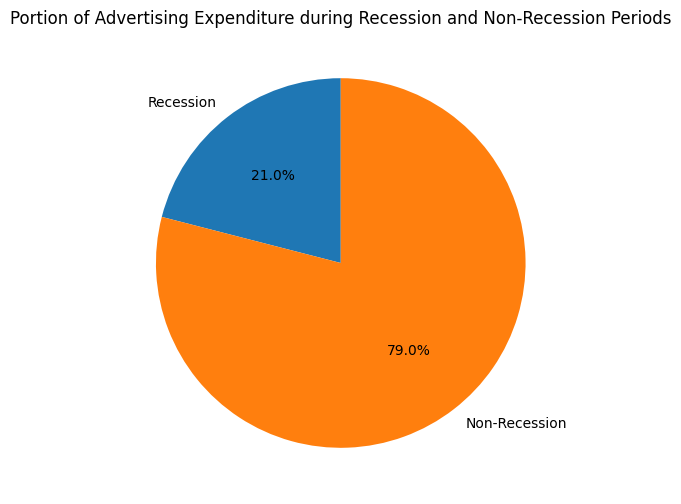

In [22]:
# Filter the data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Portion of Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

## TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

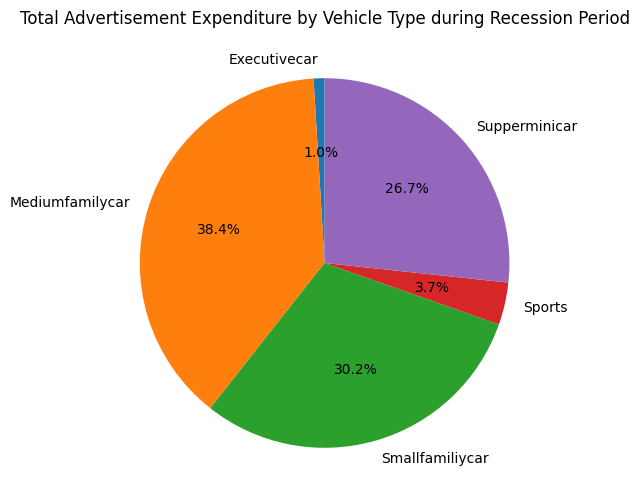

In [23]:
# Filter the data for recession period
Rdata = df[df['Recession'] == 1]

# Calculate the advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertisement Expenditure by Vehicle Type during Recession Period')

plt.show()

## TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period

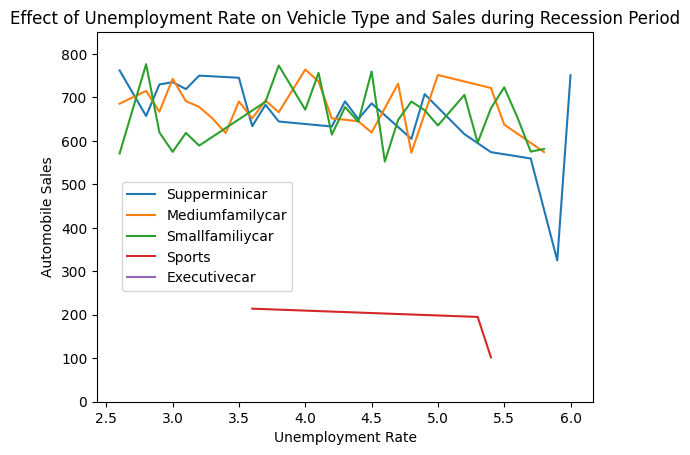

In [25]:
# Filter the data for the recession period
df_rec = df[df['Recession'] == 1]

# Create a line plot
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', markers=True, err_style=None)

# Adjust y-axis limit for better visualization
plt.ylim(0, 850)

# Adjust legend position
plt.legend(loc=(0.05, 0.3))

# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales during Recession Period')

plt.show()

## OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period